### Let us use Logistic Regression Machine Learning model to classify the hand written digits. 
1. First train the model and then apply the model on sample images.
2. Also draw Confusion Matrix to know where our model was successful nand where it failed

In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
digits = load_digits()

In [3]:
#display the names of the cols in Bunch Object
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [4]:
#display the number of rows and cols in the datsets
digits.data.shape

(1797, 64)

#### We shall be using the following :
- data[] is representation of array of the image
- images[] is the corresponding image
- target[] is the actual digit

##### To view the data related to an image, we should use digits.data[]. For example to view the data corresponding to **image 8**, we can use **digits.data[8]**

In [5]:
#to display 8th image array
digits.data[8]

array([ 0.,  0.,  9., 14.,  8.,  1.,  0.,  0.,  0.,  0., 12., 14., 14.,
       12.,  0.,  0.,  0.,  0.,  9., 10.,  0., 15.,  4.,  0.,  0.,  0.,
        3., 16., 12., 14.,  2.,  0.,  0.,  0.,  4., 16., 16.,  2.,  0.,
        0.,  0.,  3., 16.,  8., 10., 13.,  2.,  0.,  0.,  1., 15.,  1.,
        3., 16.,  8.,  0.,  0.,  0., 11., 16., 15., 11.,  1.,  0.])

#### When the image '8' was scanned and converted into an array of values, the above array is formed.

<Figure size 640x480 with 0 Axes>

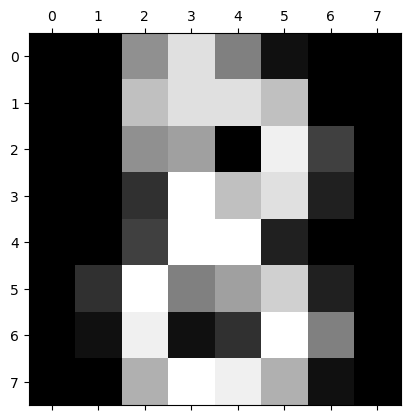

In [6]:
plt.gray() #uses gray colour to show image
plt.matshow(digits.images[8]) #display 8th image

**The greater is the number the more is the block whiter in shade, so 0 is black.**

In [7]:
#let us see the correct numeric digit of the above image
digits.target[8]

8

#### We can use the data and target for training the model, let us split the training and testing data -
- x_train = array of handwritten digit
- y_train = digit

Let us take a default 70-30 train-test split to work with.

In [8]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [9]:
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

#### Check the model accuracy -

In [10]:
model.score(x_test, y_test)

0.9666666666666667

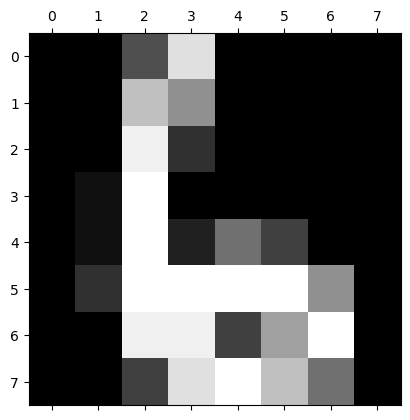

In [11]:
#let us take a random sample for prediction
#this is an image of a digit
plt.matshow(digits.images[67])

#### Here we tested our model with the 67th sample from the data set. The data corresponding to this sample was passed to predict() method to judge the digit shown by the sample.

In [12]:
#the corresponding data for this image is data[67]
#let us supply this data for our model -> gives 6
model.predict([digits.data[67]])

array([6])

#### Our model predicted here that it is digit 6.

In [13]:
#what is the actual digit?
digits.target[67]

6

#### Let us now predict digits for data [30:35] -

In [14]:
model.predict(digits.data[30:35])

array([0, 9, 5, 5, 6])

#### Verify by comparing them with actual target digits -

In [15]:
#gives array([0, 9, 5, 5, 6])
digits.target[30:35]

array([0, 9, 5, 5, 6])

In [16]:
#to view the above images
# plt.gray()
# for i in range(30,35):
#     plt.matshow(digits.images[i])

## Drawing Confusion Matrix :

#### 1. Find the predicted values by the model when test data is given -

In [17]:
y_predicted = model.predict(x_test)

#### 2. Create confusion matrix by passing expected data and predicted data -

In [18]:
cm = confusion_matrix(y_test, y_predicted)
cm

array([[50,  0,  0,  0,  0,  2,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 44,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 51,  0,  1,  0,  0,  4,  1],
       [ 0,  0,  0,  0, 58,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  1, 49,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 63,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0,  0, 59,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 54]])

#### 3. Define width and height of the figure in inches -

In [19]:
#plt is pyplot object
plt.figure(figsize=(10,7))

<Figure size 1000x700 with 0 Axes>

<Figure size 1000x700 with 0 Axes>

#### 4. Draw heatmap with values -

Text(50.722222222222214, 0.5, 'Predicted Value')

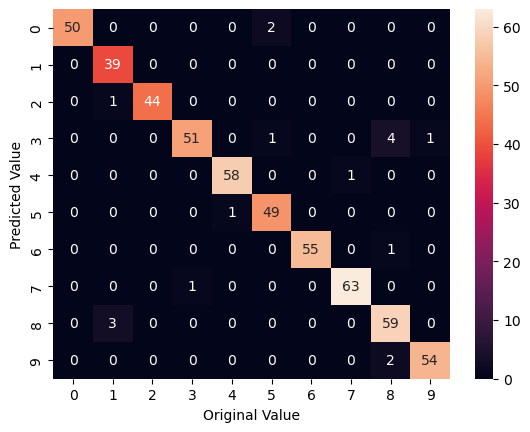

In [20]:
sns.heatmap(cm, annot=True)
plt.xlabel('Original Value')
plt.ylabel('Predicted Value')

### Now understand carefully here -
#### In the confusion matrix shown above, observe the diagonal elements or values. They are 47,57,49,...,66,48,46. But **how to understand them ?** 
1. Observe that on X axis we are plotting the original values and on Y axis we are showing predicted values by the model.
2. So, in the diagonal, 47 tells that the digit '0' was predicted for 47 times accurately as 0.
3. The value 57 tells that 1 was predicted 57 times as 1.

#### Now let us take the other values in the matrix. They represent how many times our model predicted incorrectly. If we see at the circled points, we can see that **3 was predicted as 9**, 2 times; and **7 was predicted as 3**, 1 time.